In [126]:
import pandas as pd

In [127]:
df=pd.read_csv('dataset_sensores.csv')
df

,sensor1,sensor2,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,target
0,-0.989121,0.208939,0.557609,-0.616261,-1.485264,-0.326323,-0.969005,0.637658,0.180368,-0.883388,1
1,-0.367787,-0.623170,-0.035013,0.279594,0.833989,-0.842990,-0.474100,-0.243262,-0.446569,0.431656,1
2,1.287925,0.410138,0.202057,1.667634,-1.314656,-1.203411,0.118244,-1.125350,1.175253,-1.348657,1
3,0.193974,1.650235,0.312437,-1.522121,0.224403,-2.322448,1.901773,0.368404,0.181723,1.693803,1
4,0.920231,-1.240805,-1.281850,-1.162017,1.562077,1.879348,-1.014581,-1.421919,0.967803,0.807129,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.704371,-0.139221,1.535919,0.123062,-1.064104,-0.437933,-1.392991,-0.036368,-0.665034,0.269098,0
2996,0.359027,1.891359,0.725741,-1.019465,-1.282322,-0.505201,-0.496685,0.231577,-0.236561,1.319720,1
2997,0.090772,0.543796,0.284188,-1.537121,0.072590,0.307318,-0.043212,-0.634787,1.796306,0.386892,0
2998,0.419439,0.276977,0.052192,0.691013,1.047516,-0.533635,-0.293109,2.248566,1.150962,-1.403637,1


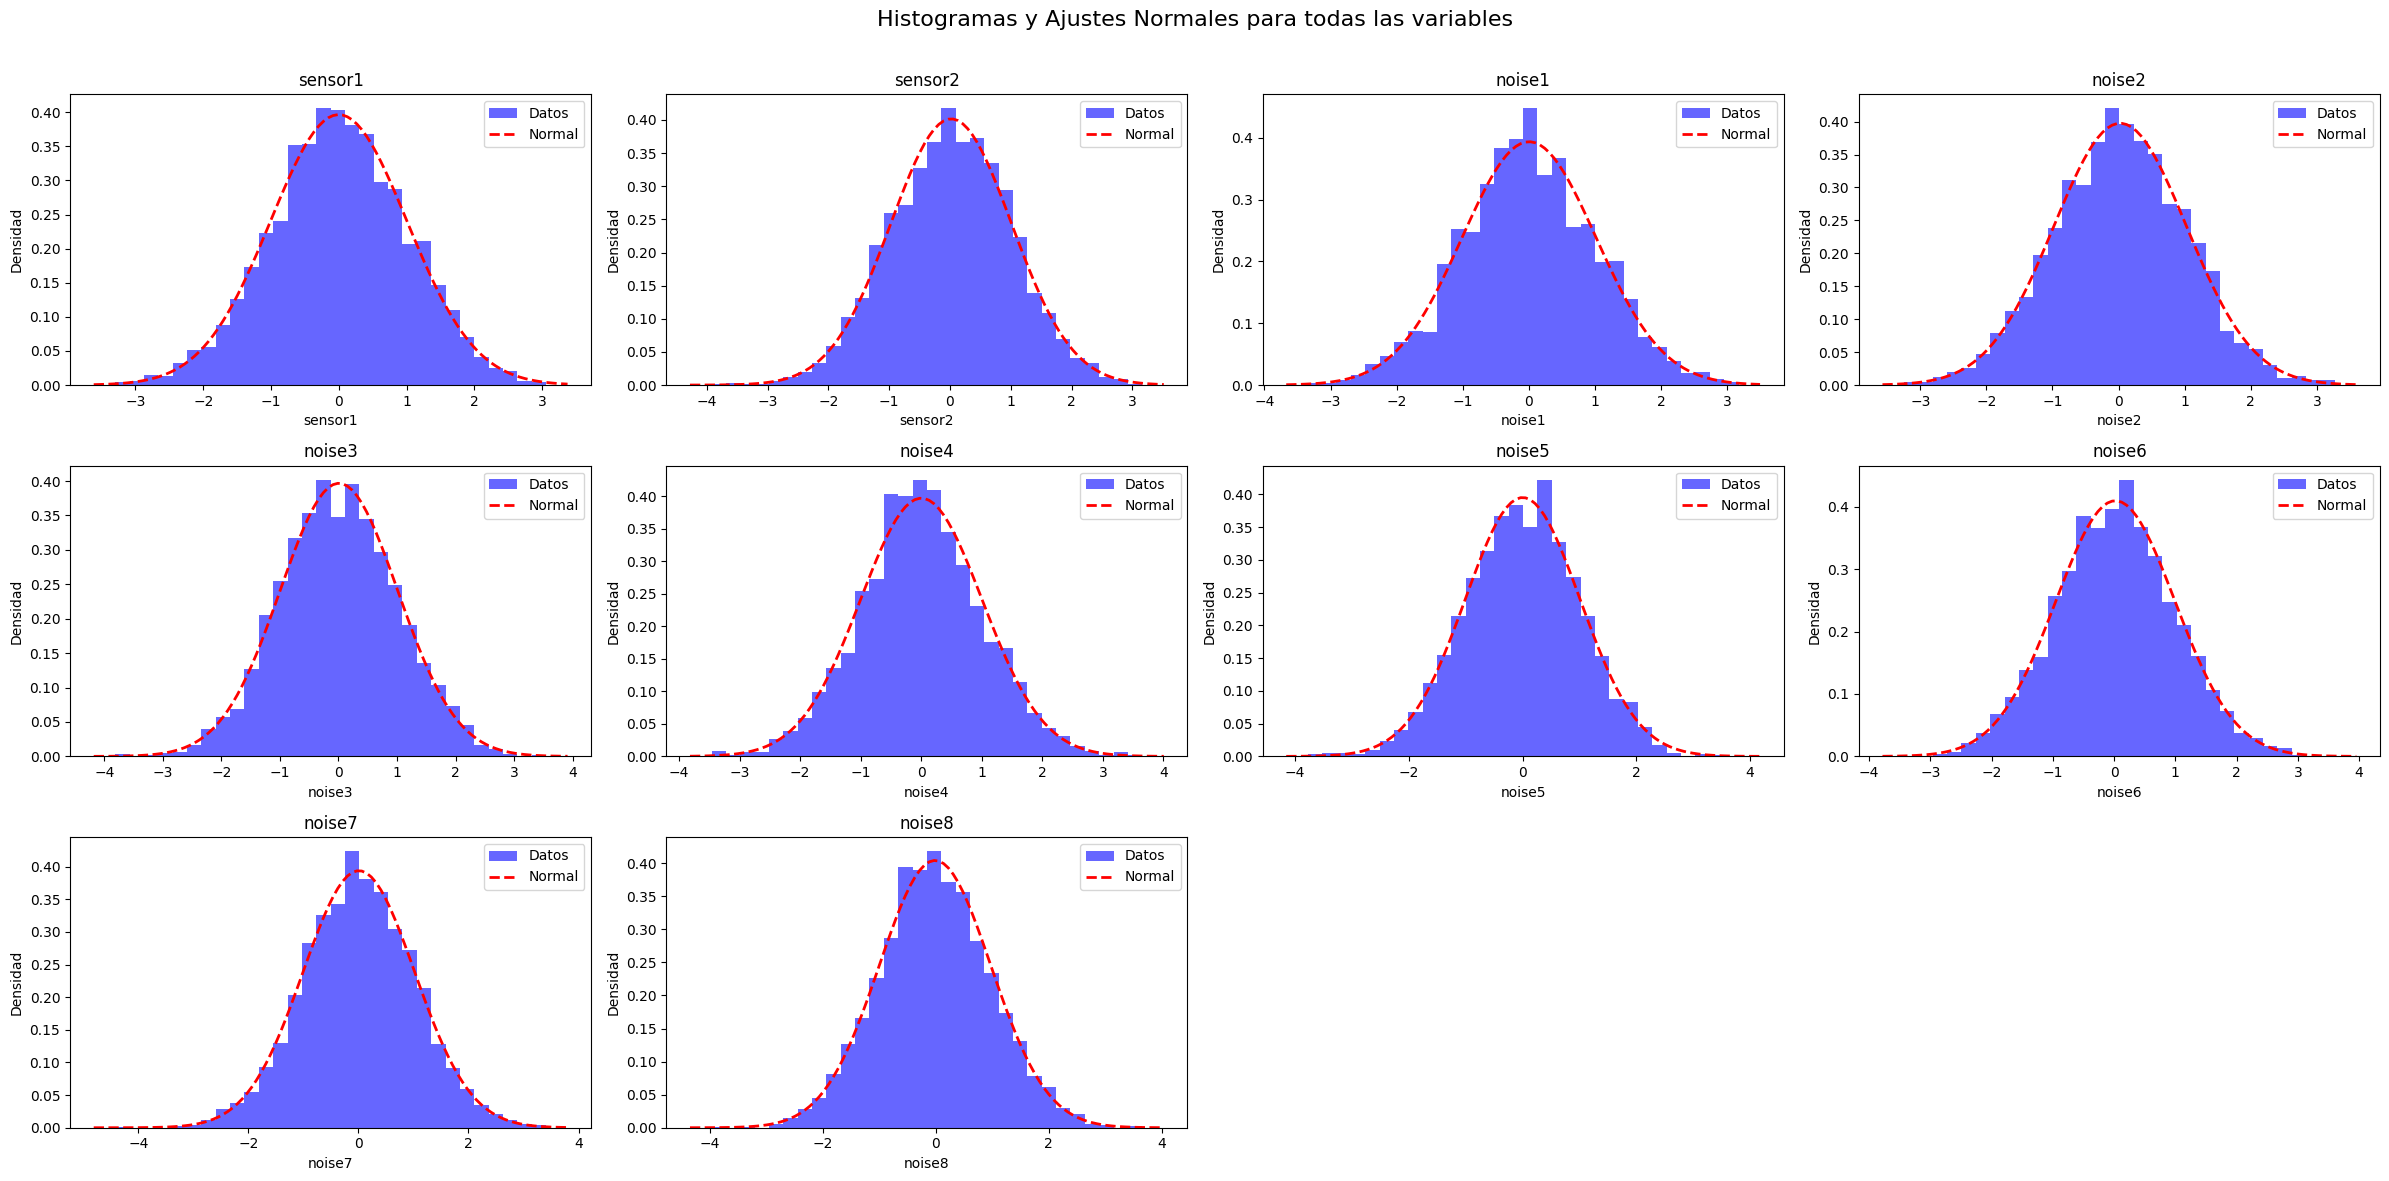

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

X = df.iloc[:, :-1]  # Seleccionar todas las columnas excepto la última

num_cols = len(X.columns)
ncols = 4
nrows = int(np.ceil(num_cols / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4))
axes = axes.flatten()

for idx, col in enumerate(X.columns):
    ax = axes[idx]
    data = X[col].dropna()
    # Histograma
    ax.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Datos')
    # Ajuste normal
    mu, std = norm.fit(data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r--', linewidth=2, label='Normal')
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad')
    ax.legend()

# Elimina ejes vacíos si hay
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histogramas y Ajustes Normales para todas las variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [129]:
from sklearn.model_selection import train_test_split

# Supongamos que 'df' es el DataFrame original y la variable objetivo es 'target'
X = df.iloc[:, :-1]  # todas las columnas excepto 'target'
y = df['target']  # columna 'target'

# División en conjunto de entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=2025, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=2025, stratify=y_temp   
)

In [130]:
from sklearn.preprocessing import StandardScaler

# Crear un StandardScaler para escalar las características (media=0, desviación estándar=1).
# IMPORTANTE: se ajusta solo con los datos de entrenamiento para evitar fuga de información.
scaler = StandardScaler()

# Ajustar el scaler con X_train y transformar X_train (fit en entrenamiento).
X_train_scaled = scaler.fit_transform(X_train)

# Usar el mismo scaler ya ajustado para transformar X_val y X_test (transform, no fit).
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reconstruir los DataFrames escalados manteniendo nombres de columnas e índices originales.
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV

cv_params={
    'criterion':['gini', 'entropy', 'log_loss'],
    'random_state':[2025],
    'n_estimators':range(100, 210, 50) #Se hizo el entrenamiento hasta 2100 y 200 fue el mejor match. Se hizo reducción de 100 a 200 con intervalos de 50. 
}

clf_rf = GridSearchCV(RandomForestClassifier(), cv_params, cv=10, verbose=2)
clf_rf.fit(X_train, y_train)


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.7s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.5s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.6s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.6s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.6s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.5s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.4s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.5s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.4s
[CV] END criterion=gini, n_estimators=100, random_state=2025; total time=   1.4s
[CV] END criterion=gini, n_estimators=150, random_state=2025; total time=   2.2s
[CV] END criterion=gini, n_estimators=150, rando

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': range(100, 210, 50),
                         'random_state': [2025]},
             verbose=2)

In [132]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores parámetros encontrados:", clf_rf.best_params_)
print("\nMejor precisión (accuracy) media de validación cruzada: {:.4f}".format(clf_rf.best_score_))

Mejores parámetros encontrados: {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 2025}

Mejor precisión (accuracy) media de validación cruzada: 0.8586


In [133]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

y_pred = clf_rf.predict(X_test)

print("\nMétricas de evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))
print("Accuracy en conjunto de prueba: {:.4f}".format(accuracy_score(y_test, y_pred)))


Métricas de evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       228
           1       0.85      0.85      0.85       222

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450

Accuracy en conjunto de prueba: 0.8533


In [134]:
confusion_matrix(y_test, y_pred)

array([[195,  33],
       [ 33, 189]], dtype=int64)

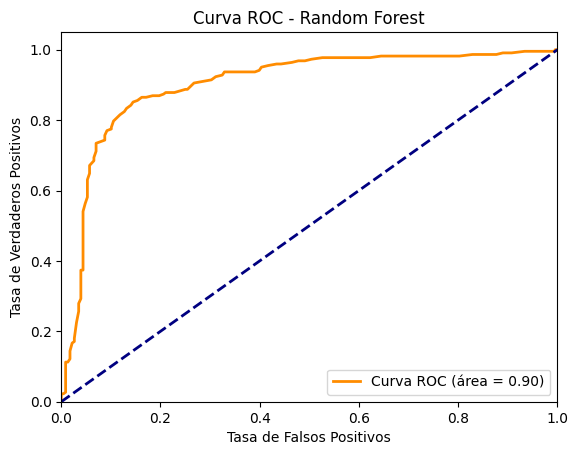

In [135]:
# Graficar la curva ROC para el mejor modelo de Decision Tree (clf_rf)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Necesitamos vector binario para la variable de salida
# Por defecto en este dataset: 'M' (maligno), 'B' (benigno). Codificamos: M=1, B=0
y_test_bin = y_test
y_prob = clf_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [136]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

SEMILLA = 42
np.random.seed(SEMILLA)
tf.random.set_seed(SEMILLA)

# Definir la arquitectura de la red neuronal

model = keras.Sequential([
    layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)), #Capa de entrada 
    layers.Dense(16, activation="relu"), #Primera capa oculta
    layers.Dense(8, activation="relu"), #Segunda capa oculta
    layers.Dense(1, activation="sigmoid") #Capa de salida
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 16)                176       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [137]:
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
h = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    batch_size=20,
    callbacks=[es],
    verbose=1
)

Epoch 1/500
105/105 [==============================] - 2s 10ms/step - loss: 0.6986 - accuracy: 0.4852 - auc: 0.4866 - val_loss: 0.6897 - val_accuracy: 0.5289 - val_auc: 0.5531
Epoch 2/500
105/105 [==============================] - 1s 8ms/step - loss: 0.6874 - accuracy: 0.5348 - auc: 0.5678 - val_loss: 0.6852 - val_accuracy: 0.5644 - val_auc: 0.5894
Epoch 3/500
105/105 [==============================] - 1s 7ms/step - loss: 0.6773 - accuracy: 0.5695 - auc: 0.6165 - val_loss: 0.6795 - val_accuracy: 0.5867 - val_auc: 0.6112
Epoch 4/500
105/105 [==============================] - 1s 10ms/step - loss: 0.6632 - accuracy: 0.5976 - auc: 0.6517 - val_loss: 0.6677 - val_accuracy: 0.5844 - val_auc: 0.6493
Epoch 5/500
105/105 [==============================] - 1s 12ms/step - loss: 0.6452 - accuracy: 0.6314 - auc: 0.6920 - val_loss: 0.6547 - val_accuracy: 0.6267 - val_auc: 0.6793
Epoch 6/500
105/105 [==============================] - 1s 11ms/step - loss: 0.6184 - accuracy: 0.6638 - auc: 0.7383 - val_

In [138]:
print("\n=== Evaluación Keras (test) ===")
loss_test, acc_test, auc_test = model.evaluate(X_test, y_test, verbose=0)
print(f"loss: {loss_test:.4f} | acc: {acc_test:.4f} | auc: {auc_test:.4f}")


=== Evaluación Keras (test) ===
loss: 0.3694 | acc: 0.8600 | auc: 0.9121


In [139]:
y_proba = model.predict(X_test, verbose=0).ravel()
y_hat   = (y_proba >= 0.5).astype(int)

acc  = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
rec  = recall_score(y_test, y_hat)
f1   = f1_score(y_test, y_hat)
auc  = roc_auc_score(y_test, y_proba)

print("\n=== Métricas adicionales (test) ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")
print(f"AUC:       {auc:.4f}")


=== Métricas adicionales (test) ===
Accuracy:  0.8600
Precision: 0.8597
Recall:    0.8559
F1:        0.8578
AUC:       0.9123


In [140]:
print("\n=== Reporte de clasificación (test) ===")
print(classification_report(y_test, y_hat, digits=4))


=== Reporte de clasificación (test) ===
              precision    recall  f1-score   support

           0     0.8603    0.8640    0.8621       228
           1     0.8597    0.8559    0.8578       222

    accuracy                         0.8600       450
   macro avg     0.8600    0.8599    0.8600       450
weighted avg     0.8600    0.8600    0.8600       450



In [141]:
confusion_matrix(y_test, y_hat)

array([[197,  31],
       [ 32, 190]], dtype=int64)

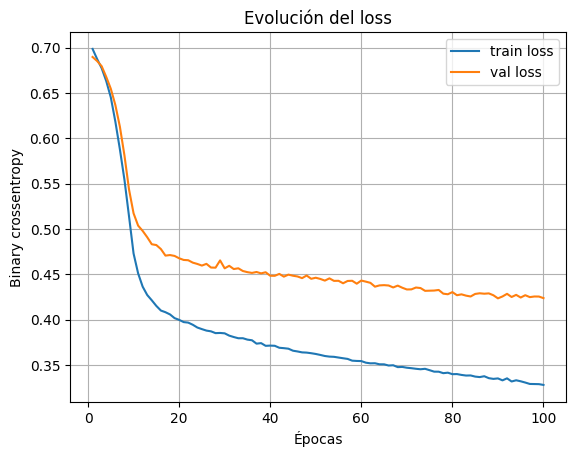

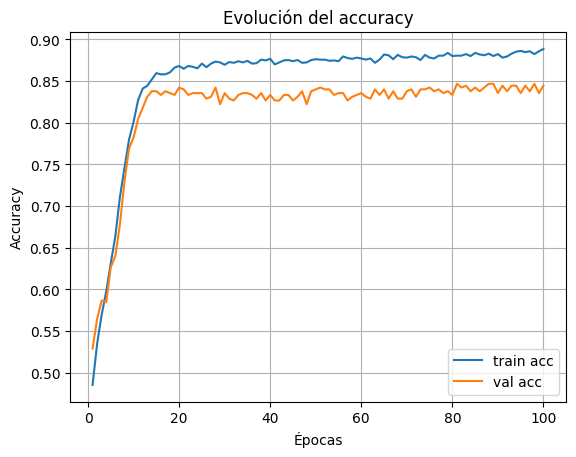

In [142]:
epochs = range(1, len(h.history["loss"]) + 1)

plt.figure()
plt.plot(epochs, h.history["loss"], label="train loss")
plt.plot(epochs, h.history["val_loss"], label="val loss")
plt.xlabel("Épocas"); plt.ylabel("Binary crossentropy")
plt.title("Evolución del loss")
plt.legend(); plt.grid(True); plt.show()

plt.figure()
plt.plot(epochs, h.history["accuracy"], label="train acc")
plt.plot(epochs, h.history["val_accuracy"], label="val acc")
plt.xlabel("Épocas"); plt.ylabel("Accuracy")
plt.title("Evolución del accuracy")
plt.legend(); plt.grid(True); plt.show()

In [143]:
df_predict=pd.read_csv('predict_sensores.csv')
df_predict

,sensor1,sensor2,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8
0,0.896040,1.172377,-0.138708,-0.968773,0.681022,1.200568,-0.432308,0.641424,1.528782,-0.233098
1,-2.123949,0.068681,-0.236848,0.158286,1.790371,-0.941516,-0.129430,-0.703246,0.343755,1.017703
2,1.640204,-0.806608,0.399302,-1.164659,0.270042,-0.172383,-0.303618,-0.502360,-0.312711,-2.233537
3,-0.035307,0.135437,0.965891,0.506428,-0.489020,-0.277953,-0.359084,0.769461,0.488250,0.593075
4,-2.602765,-0.923161,0.071780,-0.357477,-0.026260,1.433086,0.137854,0.155194,-0.396684,-0.758428
5,-0.190065,-0.280828,-0.990147,0.596544,-0.597315,0.290488,1.793674,-1.641473,-0.418776,-0.152123
6,-0.664110,1.596694,2.807322,0.180775,-0.117236,-0.619909,1.664431,-0.800144,-1.785872,0.849264
7,-0.414703,-0.148830,-0.454228,0.483035,2.319951,0.195964,0.308239,1.860870,-1.716124,0.234702
8,-0.292445,-0.212114,0.893464,1.836779,-2.408637,0.748919,0.083591,-0.476021,0.951101,-0.450730
9,1.945005,-1.386717,0.310227,-0.672670,0.429230,0.126669,0.271812,-1.242992,0.522185,0.432922


In [144]:
X_predict_scaled=scaler.transform(df_predict)
X_predict = pd.DataFrame(X_predict_scaled, columns=df_predict.columns, index=df_predict.index)

In [145]:
#Contar la cantidad de 1.
y_predict = model.predict(X_predict, verbose=0).ravel()
y_hat_predict   = (y_predict >= 0.5).astype(int)

In [146]:
# Contar la cantidad de elementos iguales a 1 en y_hat_predict
count_ones = int((y_hat_predict == 1).sum())
count_ones

19